In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
#normalizing the columns
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree','Class']

In [7]:
# normalizing with pandas

diabetes[cols_to_norm] =diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1.0,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0.0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1.0,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0.0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1.0,C


In [10]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [13]:
### feature columns for Estimator API (continuos values)

num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press= tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin =tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age= tf.feature_column.numeric_column('Age')

In [15]:
### feature columns for estimator API (categorical or Non-Continuos Values)

# Vocabulary List
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(key ='Group',
                                                                          vocabulary_list=['A','B','C','D'])
                                                                          

In [16]:
##assigned_group = tf.feature_column.categorical_column_with_hash_bucket(key='Group',
                                                                      hash_bucket_size=10)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

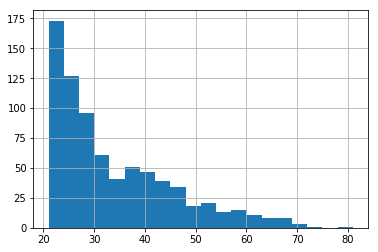

In [19]:
#### visualizing the age histogram to get the information for applying feature engineering
diabetes['Age'].hist(bins =20)

In [21]:
###converting the age continuos column to bucketized 

age_bucket = tf.feature_column.bucketized_column(source_column=age,
                                                 boundaries=[20,30,40,50,60,70,80])

In [22]:
feat_cols=[num_preg,plasma_gluc,dias_press,
          tricep,insulin,bmi,
          diabetes_pedigree,assigned_group,age_bucket]

In [24]:
### train test split
x_data = diabetes.drop('Class', axis=1)
x_data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,A
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,C
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,A
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,D
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,A


In [26]:
labels = diabetes['Class']
labels

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
5      0.0
6      1.0
7      0.0
8      1.0
9      1.0
10     0.0
11     1.0
12     0.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     0.0
19     1.0
20     0.0
21     0.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     0.0
28     0.0
29     0.0
      ... 
738    0.0
739    1.0
740    1.0
741    0.0
742    0.0
743    1.0
744    0.0
745    0.0
746    1.0
747    0.0
748    1.0
749    1.0
750    1.0
751    0.0
752    0.0
753    1.0
754    1.0
755    1.0
756    0.0
757    1.0
758    0.0
759    1.0
760    0.0
761    1.0
762    0.0
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Class, Length: 768, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_data,labels,test_size= 0.3, random_state =101)

In [30]:
### Now lets use the estimator API

In [31]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)

In [32]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                 n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpi1scncux', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a27f14400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpi1scncux/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 234.092
INFO:tensorflow:loss = 4.83164, step = 101 (0.429 sec)
INFO:tensorflow:global_step/sec: 454.862
INFO:tensorflow:loss = 5.2628202, step = 201 (0.222 sec)
INFO:tensorflow:global_step/sec: 436.386
INFO:tensorflow:loss = 6.4240265, step = 301 (0.228 sec)
INFO:tensorflow:global_step/sec: 452.202
INFO:tensorflow:loss = 6.982041, step = 401 (0.223 sec)
INFO:tensorflow:global_step/sec: 461.766
INFO:tensorflow:loss = 7.1144214, step = 501 (0.214 sec)
INFO:tensorflow:global_step/sec: 452.662
INFO:tensorflow:loss = 6.556007, step = 601 (0.220 sec)
INFO:tensorflow:gl

In [34]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     y=y_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [35]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-27-01:59:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpi1scncux/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-27-01:59:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.80781895, auc_precision_recall = 0.65626264, average_loss = 0.5240651, global_step = 1000, label/mean = 0.35064936, loss = 5.044126, precision = 0.64788735, prediction/mean = 0.38141716, recall = 0.56790125


In [36]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80781895,
 'auc_precision_recall': 0.65626264,
 'average_loss': 0.5240651,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.044126,
 'precision': 0.64788735,
 'prediction/mean': 0.38141716,
 'recall': 0.56790125}

In [37]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [38]:
prediction = model.predict(pred_input_func)

In [39]:
my_predictions=list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpi1scncux/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [40]:
my_predictions


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.54109216], dtype=float32),
  'logits': array([0.1647402], dtype=float32),
  'probabilities': array([0.45890784, 0.54109216], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6565535], dtype=float32),
  'logits': array([0.64797294], dtype=float32),
  'probabilities': array([0.34344646, 0.6565535 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.39328527], dtype=float32),
  'logits': array([-0.43352342], dtype=float32),
  'probabilities': array([0.6067147, 0.3932853], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35266945], dtype=float32),
  'logits': array([-0.6073259], dtype=float32),
  'probabilities': array([0.6473306 , 0.35266945], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obj

In [41]:
### Predicting with Dense Neural Network from Estimator API

In [44]:
### Embedded Group needed for Deep Neural Network
embedded_group_col = tf.feature_column.embedding_column(categorical_column=assigned_group,
                                                       dimension=4)

In [45]:
feat_cols =[num_preg,plasma_gluc,dias_press,
          tricep,insulin,bmi,
          diabetes_pedigree,embedded_group_col,age_bucket]

In [46]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,
                                                y=y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)

In [51]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10,20,20,20],
                                      feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpo3i_bfkv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a287148d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [52]:
dnn_model.train(input_fn=input_func,
               steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpo3i_bfkv/model.ckpt.
INFO:tensorflow:loss = 7.1215334, step = 1
INFO:tensorflow:global_step/sec: 256.721
INFO:tensorflow:loss = 7.562779, step = 101 (0.393 sec)
INFO:tensorflow:global_step/sec: 412.504
INFO:tensorflow:loss = 4.7809696, step = 201 (0.241 sec)
INFO:tensorflow:global_step/sec: 455.936
INFO:tensorflow:loss = 4.1179047, step = 301 (0.219 sec)
INFO:tensorflow:global_step/sec: 472.061
INFO:tensorflow:loss = 6.4997187, step = 401 (0.211 sec)
INFO:tensorflow:global_step/sec: 440.561
INFO:tensorflow:loss = 6.51752, step = 501 (0.226 sec)
INFO:tensorflow:global_step/sec: 455.914
INFO:tensorflow:loss = 7.523772, step = 601 (0.219 sec)
INFO:tensorflow:g

In [53]:
input_eval_func= tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                    y=y_test,
                                                    batch_size=10,
                                                    num_epochs=1,
                                                    shuffle=False)

In [54]:
dnn_model.evaluate(input_fn=input_eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-27-03:04:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpo3i_bfkv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-27-03:04:46
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.75757575, accuracy_baseline = 0.64935064, auc = 0.8402058, auc_precision_recall = 0.69740456, average_loss = 0.47749606, global_step = 1000, label/mean = 0.35064936, loss = 4.5958996, precision = 0.6436782, prediction/mean = 0.3947967, recall = 0.69135803


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8402058,
 'auc_precision_recall': 0.69740456,
 'average_loss': 0.47749606,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.5958996,
 'precision': 0.6436782,
 'prediction/mean': 0.3947967,
 'recall': 0.69135803}

In [55]:
input_pred_func= tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     batch_size=128,
                                                     num_epochs=1,
                                                     shuffle=True)
                                                    

In [56]:
prediction = model.predict(input_fn=input_pred_func)

In [57]:
my_prediction = list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpi1scncux/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [58]:
my_prediction

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.2833394], dtype=float32),
  'logits': array([-0.9279568], dtype=float32),
  'probabilities': array([0.71666056, 0.2833394 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.38096783], dtype=float32),
  'logits': array([-0.48544246], dtype=float32),
  'probabilities': array([0.6190322 , 0.38096783], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.36240423], dtype=float32),
  'logits': array([-0.5649443], dtype=float32),
  'probabilities': array([0.6375958, 0.3624042], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.24520281], dtype=float32),
  'logits': array([-1.1243634], dtype=float32),
  'probabilities': array([0.7547972 , 0.24520282], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=ob